# 1. Используйте датасет из прошлой лабы

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [208]:
X_train = pd.read_csv("Mall_Customer_train.csv")
X_test = pd.read_csv("Mall_Customer_test.csv")
y_train = pd.read_csv("Spending_Score_train.csv")
y_test = pd.read_csv("Spending_Score_test.csv")

In [209]:
X_train_np = np.c_[np.ones((X_train.shape[0], 1)), X_train.values]
X_test_np = np.c_[np.ones((X_test.shape[0], 1)), X_test.values]
y_train_np = y_train.values
y_test_np = y_test.values

# 2. Реализация градиентного спуска

In [210]:
def gradient_descent(X, y, learning_rate=0.05, n_iterations=1000, epsilon=1e-6):
    m = len(y)
    theta = np.random.randn(X.shape[1], 1) # вектор весов
    mse_history = []

    for iteration in range(n_iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        new_theta = theta - learning_rate * gradients
        # среднеквадратическая ошибка, функция потерь
        mse = np.mean((X.dot(new_theta) - y) ** 2)
        mse_history.append(mse)

        if np.linalg.norm(new_theta - theta) < epsilon:
            break
        theta = new_theta

    return theta, mse_history

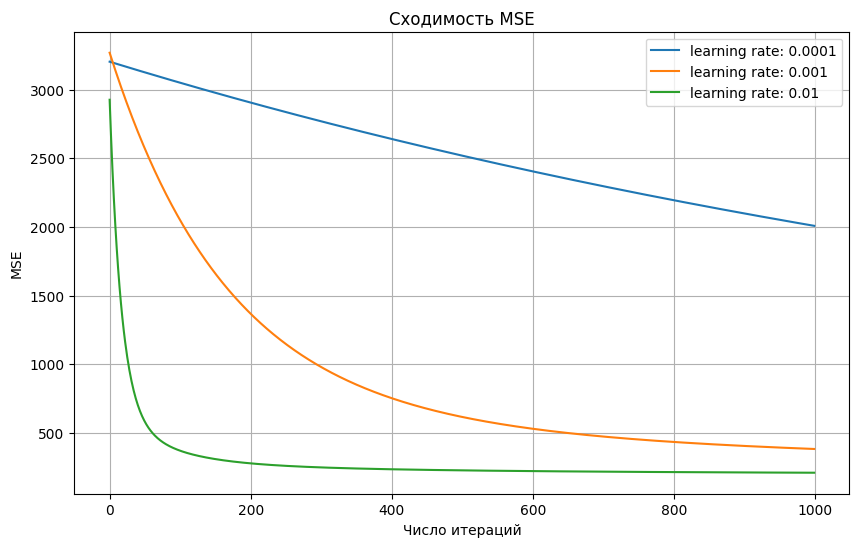

In [211]:
# разные скорости обучения
learning_rates = [1e-4, 1e-3, 1e-2]
final_mse = []

plt.figure(figsize=(10, 6))

for lr in learning_rates:
    _, mse_history = gradient_descent(X_train_np, y_train_np, learning_rate=lr)
    final_mse.append(mse_history[-1])
    plt.plot(mse_history, label=f"learning rate: {lr}")

plt.xlabel("Число итераций")
plt.ylabel("MSE")
plt.title("Сходимость MSE")
plt.legend()
plt.grid(True)
plt.show()

# 4. Функция стохастического градиентного спуска

In [212]:
def stochastic_gradient_descent(X, y, learning_rate=0.05, n_iterations=1000):
    m = len(y)
    theta = np.random.randn(X.shape[1], 1)
    mse_history = []

    for iteration in range(n_iterations):
        random_index = np.random.randint(m)
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - learning_rate * gradients
        mse = np.mean((X.dot(theta) - y) ** 2)
        mse_history.append(mse)

    return theta, mse_history


# 5. Обучение модели

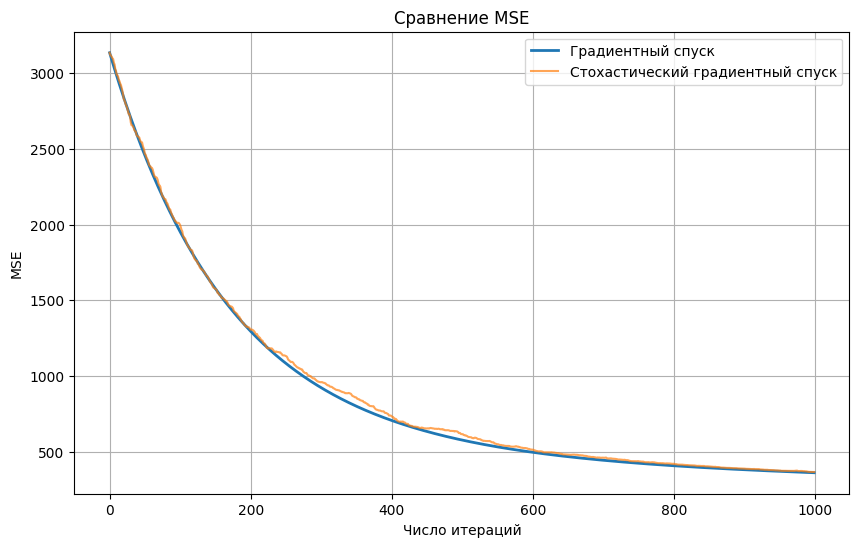

In [213]:
theta_gd, mse_gd = gradient_descent(X_train_np, y_train_np, learning_rate=0.001)
theta_sgd, mse_sgd = stochastic_gradient_descent(X_train_np, y_train_np, learning_rate=0.001)

plt.figure(figsize=(10, 6))
plt.plot(mse_gd, label="Градиентный спуск", linewidth=2)
plt.plot(mse_sgd, label="Стохастический градиентный спуск", alpha=0.7)
plt.xlabel("Число итераций")
plt.ylabel("MSE")
plt.title("Сравнение MSE")
plt.legend()
plt.grid(True)
plt.show()

# 6. L2 регуляризация

In [214]:
def gradient_descent_l2(X, y, alpha=0.1, learning_rate=0.01, n_iterations=1000, epsilon=1e-6):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    weights_history = []

    for iteration in range(n_iterations):
        gradient_mse = 2/m * X.T.dot(X.dot(theta) - y)
        gradient_l2 = 2 * alpha * theta
        gradients = gradient_mse + gradient_l2
        new_theta = theta - learning_rate * gradients
        weights_history.append(new_theta.flatten())
        if np.linalg.norm(new_theta - theta) < epsilon:
            break
        theta = new_theta

    return theta, np.array(weights_history)


In [240]:
alphas = np.logspace(0.001, 2, 20)
final_weights = []

for alpha in alphas:
    theta_final, _ = gradient_descent_l2(X_train_np, y_train_np, alpha=alpha, learning_rate=0.001)
    final_weights.append(theta_final.flatten())

final_weights = np.array(final_weights)

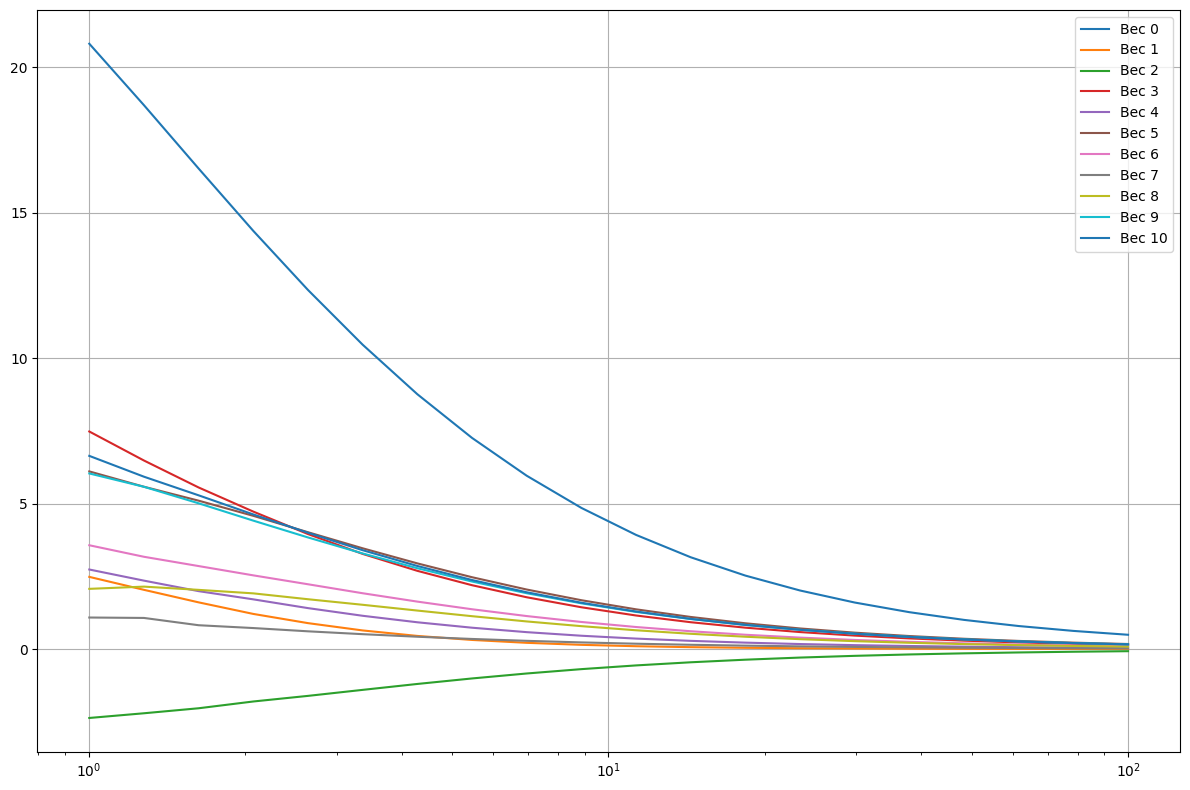

In [241]:
plt.figure(figsize=(12, 8))
for i in range(final_weights.shape[1]):
    plt.plot(alphas, final_weights[:, i], label=f'Вес {i}')

plt.xscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()